In [ ]:
# Use the wget command to download the ZIP file containing all CSVs
!wget http://cicresearch.ca/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip

# The file will be saved in your current working directory in the Colab instance, which is typically /content/

--2025-10-15 18:21:55--  http://cicresearch.ca/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip
Resolving cicresearch.ca (cicresearch.ca)... 205.174.165.80
Connecting to cicresearch.ca (cicresearch.ca)|205.174.165.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235102953 (224M) [application/zip]
Saving to: ‘MachineLearningCSV.zip’

MachineLearningCSV. 100%[===================>] 224.21M  7.33MB/s    in 61s     

2025-10-15 18:22:56 (3.69 MB/s) - ‘MachineLearningCSV.zip’ saved [235102953/235102953]



In [ ]:
 # Unzip the downloaded file
!unzip MachineLearningCSV.zip

In [ ]:
import pandas as pd
import os

# Define the base directory where the CSV files are located
data_dir = '/content/MachineLearningCVE/'

# Get a list of all CSV files in that directory
# We use endswith('.csv') to ensure we only target the data files.
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]

print(f"Found {len(all_files)} files to process.")
# print(all_files) # Uncomment this to see the list of file paths

In [ ]:
# Define the base directory where the CSV files are located
data_dir = '/content/MachineLearningCVE/'

# Get a list of all CSV files in that directory
all_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.csv')]

print(f"Found {len(all_files)} files to process.\n")

# Initialize an empty list to hold the DataFrames
list_of_dfs = []

# --- 1. Read and Concatenate ---
for file_path in all_files:
    try:
        # Read the CSV file
        df_temp = pd.read_csv(file_path, low_memory=False)

        # Add the temporary DataFrame to our list
        list_of_dfs.append(df_temp)

        print(f"Loaded: {os.path.basename(file_path)} with shape {df_temp.shape}")

    except Exception as e:
        print(f"Error loading {os.path.basename(file_path)}: {e}")

# Concatenate all DataFrames in the list into one DataFrame
df = pd.concat(list_of_dfs, ignore_index=True)

print("\n--- Concatenation Complete ---")
print(f"Final shape of the raw master DataFrame: {df.shape}")
print("\nFirst 5 rows of the combined DataFrame:")
print(df.head())

In [ ]:

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import f1_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix

In [ ]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import os
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import scipy
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold, cross_validate, cross_val_predict
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, matthews_corrcoef, confusion_matrix

In [ ]:
df.drop(' Destination Port',axis=1, inplace=True)
df.columns = df.columns.str.strip()
#since the total sum of null values are so little so we will remove the these rows completely
print(df['Label'].unique())
df['Label'].value_counts()
# duplicates,missing and infinity values
df.replace('Infinity', -1, inplace=True)
df[["Flow Bytes/s", "Flow Packets/s"]] = df[["Flow Bytes/s", "Flow Packets/s"]].apply(pd.to_numeric)
df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)
print(df.shape)
#  Remove duplicate rows ---
df = df.drop_duplicates()
print(f" Duplicates removed. New shape: {df.shape}")

# Replace infinity values (∞, -∞) with NaN ---
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(" Replaced infinity values with NaN.")

#  Drop rows with any remaining NaN values ---
df.dropna(inplace=True)
print(f" Dropped rows with null values. Final shape: {df.shape}")


In [10]:
woa_indices = [6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 21, 23, 26, 29]
chi_indices = [0, 9, 11, 12, 16, 17, 19, 21, 22, 27, 38, 39, 40, 41, 42, 51, 53, 73, 75, 76,]

union_indices = sorted(set(woa_indices) | set(chi_indices))
print(union_indices)

[0, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 26, 27, 29, 38, 39, 40, 41, 42, 51, 53, 73, 75, 76]


In [11]:
new_df = df.iloc[:, union_indices]
print("New shape:", new_df.shape)
print("Selected columns:", new_df.columns.tolist())

New shape: (2233963, 30)
Selected columns: ['Flow Duration', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'Average Packet Size', 'Avg Bwd Segment Size', 'Idle Mean', 'Idle Max', 'Idle Min']


In [13]:
new_df = df.iloc[:, union_indices].copy()
new_df["Label"] = df["Label"]

print("New shape:", new_df.shape)
print("Selected columns:", new_df.columns.tolist())

New shape: (2233963, 31)
Selected columns: ['Flow Duration', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'Average Packet Size', 'Avg Bwd Segment Size', 'Idle Mean', 'Idle Max', 'Idle Min', 'Label']


In [17]:
#label encoding
from collections import Counter
# original labels
y = new_df['Label']
# set threshold for "rare" classes
threshold = 100   # you can tune this (<= 100 samples → merge)
counts = Counter(y)
# group rare classes into "OtherAttack"
y_grouped = y.apply(lambda x: x if counts[x] >= threshold else "OtherAttack")
print("Original counts:\n", pd.Series(y).value_counts())
print("\nAfter grouping:\n", pd.Series(y_grouped).value_counts())


Original counts:
 Label
BENIGN                        1897458
DoS Hulk                       172849
DDoS                           128016
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1958
Web Attack � Brute Force         1470
Bot                              1441
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

After grouping:
 Label
BENIGN                      1897458
DoS Hulk                     172849
DDoS                         128016
DoS GoldenEye                 10286
FTP-Patator                    5933
DoS slowloris                  5385
DoS Slowhttptest               5228
SSH-Patator                    3219
PortScan                       1958
Web Attack � Brute Force       1

In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate features (X) and target (y)
X = new_df.drop(columns=["Label"])   # all columns except Label
y = y_grouped                        # use the grouped labels you created

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("After cleaning & scaling:", X_scaled.shape, y.shape)


After cleaning & scaling: (2233963, 30) (2233963,)


In [20]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("After cleaning & scaling:", X_scaled.shape, y_encoded.shape)
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y_encoded, test_size=0.3, random_state=42 )

After cleaning & scaling: (2233963, 30) (2233963,)


In [21]:
#creating the input and output features
X = df.drop(columns=['Label'])
y = y_grouped
# drop non numeric data types with labels
drop_cols = [c for c in ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp'] if c in X.columns]
X = X.drop(columns=drop_cols, errors='ignore')

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [25]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

=== Random Forest (Sampled Dataset) ===
Accuracy: 0.9984
Weighted F1: 0.9984
Classification Report:
                          precision    recall  f1-score   support

                  BENIGN       1.00      1.00      1.00    569263
                     Bot       0.81      0.62      0.70       416
                    DDoS       1.00      1.00      1.00     38450
           DoS GoldenEye       1.00      1.00      1.00      3032
                DoS Hulk       1.00      1.00      1.00     51855
        DoS Slowhttptest       0.95      0.99      0.97      1569
           DoS slowloris       0.99      1.00      0.99      1675
             FTP-Patator       1.00      1.00      1.00      1710
             OtherAttack       0.82      0.47      0.60        19
                PortScan       0.93      0.94      0.94       544
             SSH-Patator       1.00      0.96      0.98       975
Web Attack � Brute Force       0.71      0.75      0.73       470
        Web Attack � XSS       0.40      

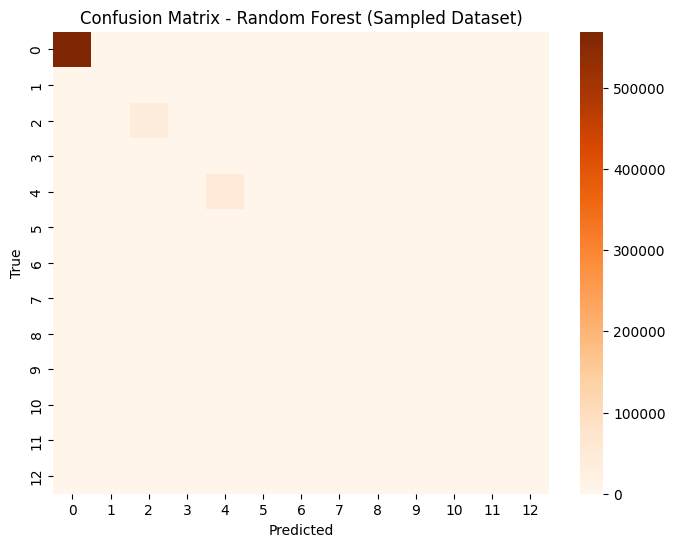

Time taken: 581.21 seconds


In [26]:
#RANDOM FOREST

start = time.time()

# Initialize Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=50,  # fewer trees for faster training on sample
    max_depth=None,   # let trees grow fully
    random_state=42,
    n_jobs=-1
)

# Train Random Forest on sampled data
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
report_rf = classification_report(y_test, y_pred_rf)

print("=== Random Forest (Sampled Dataset) ===")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Weighted F1: {f1_rf:.4f}")
print(f"Classification Report:\n{report_rf}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=False, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Random Forest (Sampled Dataset)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

end = time.time()
print(f"Time taken: {end - start:.2f} seconds")
